In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats



In [7]:
def univariate_analysis(df, column):
    freq = df[column].value_counts()
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]
    std = df[column].std()
    return freq, mean, median, mode, std


In [12]:
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance.csv to StudentsPerformance (1).csv


In [13]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
print(df.shape)
df.head()


(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
def univariate(df, column):
    freq = df[column].value_counts()
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]
    std = df[column].std()
    return freq, mean, median, mode, std

freq, mean, median, mode, std = univariate(df, "math score")

print("Frequency:\n", freq)
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Std Dev:", std)


Frequency:
 math score
65    36
62    35
69    32
59    32
73    27
      ..
24     1
26     1
19     1
23     1
8      1
Name: count, Length: 81, dtype: int64
Mean: 66.089
Median: 66.0
Mode: 65
Std Dev: 15.163080096009468


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[["reading score"]]   # independent
y = df["math score"]        # dependent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Linear Regression MSE:", mse)


Linear Regression MSE: 77.75953982761706


In [16]:
features = ["reading score", "writing score"]

X = df[features]
y = df["math score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi = LinearRegression()
multi.fit(X_train, y_train)

y_pred = multi.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred)
print("Multiple Regression MSE:", mse_multi)


Multiple Regression MSE: 77.24297821278955


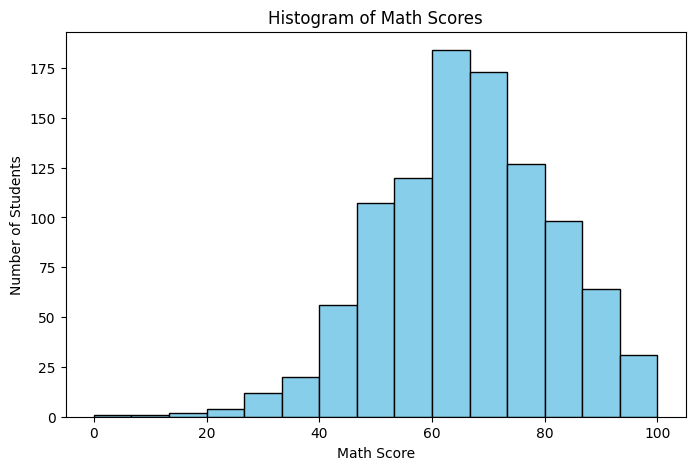

In [17]:
plt.figure(figsize=(8,5))
plt.hist(df["math score"], bins=15, color="skyblue", edgecolor="black")
plt.title("Histogram of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Number of Students")
plt.show()
